In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [2]:
bmi_labels = ["Underweight", "Healthy weight", "Overweight", "Obese"]
cut_bins = [0, 18.5, 24.9, 29.9, 150]
df['bmi_label'] = pd.cut(df['bmi'], bins=cut_bins, labels=bmi_labels)
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

           bmi_label  
0         Overweight  
1              Obese  
2              Obese  
3     Healthy weight  
4         Overweight  
...              ... 

In [3]:
df_male_ow_smokers = df.loc[df['bmi_label'].isin(["Overweight", "Obese"]) & (df['sex'] == 'male') & (df['smoker'] == 'yes')]
print(df_male_ow_smokers)

      age   sex     bmi  children smoker     region      charges   bmi_label
14     27  male  42.130         0    yes  southeast  39611.75770       Obese
19     30  male  35.300         0    yes  southwest  36837.46700       Obese
29     31  male  36.300         2    yes  southwest  38711.00000       Obese
30     22  male  35.600         0    yes  southwest  35585.57600       Obese
34     28  male  36.400         1    yes  southwest  51194.55914       Obese
...   ...   ...     ...       ...    ...        ...          ...         ...
1300   45  male  30.360         0    yes  southeast  62592.87309       Obese
1301   62  male  30.875         3    yes  northwest  46718.16325       Obese
1303   43  male  27.800         0    yes  southwest  37829.72420  Overweight
1307   32  male  28.120         4    yes  northwest  21472.47880  Overweight
1321   62  male  26.695         0    yes  northeast  28101.33305  Overweight

[136 rows x 8 columns]


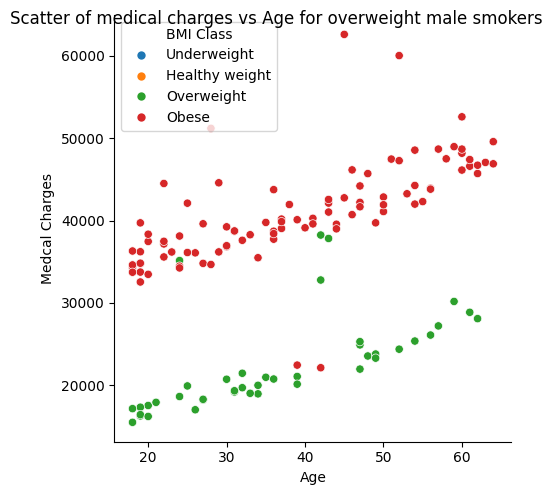

In [4]:
rel_plot = sns.relplot(df_male_ow_smokers, x='age', y='charges', hue='bmi_label', kind='scatter', facet_kws=dict(legend_out=False))
rel_plot.figure.suptitle('Scatter of medical charges vs Age for overweight male smokers')
rel_plot.set_axis_labels('Age', 'Medcal Charges')

rel_plot._legend.set_title('BMI Class')

plt.show()

In [5]:
df_male_obese_smokers = df.loc[(df['bmi_label'] == "Obese") & (df['sex'] == 'male') & (df['smoker'] == 'yes')]
print(df_male_obese_smokers)

      age   sex     bmi  children smoker     region      charges bmi_label
14     27  male  42.130         0    yes  southeast  39611.75770     Obese
19     30  male  35.300         0    yes  southwest  36837.46700     Obese
29     31  male  36.300         2    yes  southwest  38711.00000     Obese
30     22  male  35.600         0    yes  southwest  35585.57600     Obese
34     28  male  36.400         1    yes  southwest  51194.55914     Obese
...   ...   ...     ...       ...    ...        ...          ...       ...
1284   61  male  36.300         1    yes  southwest  47403.88000     Obese
1288   20  male  39.400         2    yes  southwest  38344.56600     Obese
1291   19  male  34.900         0    yes  southwest  34828.65400     Obese
1300   45  male  30.360         0    yes  southeast  62592.87309     Obese
1301   62  male  30.875         3    yes  northwest  46718.16325     Obese

[94 rows x 8 columns]


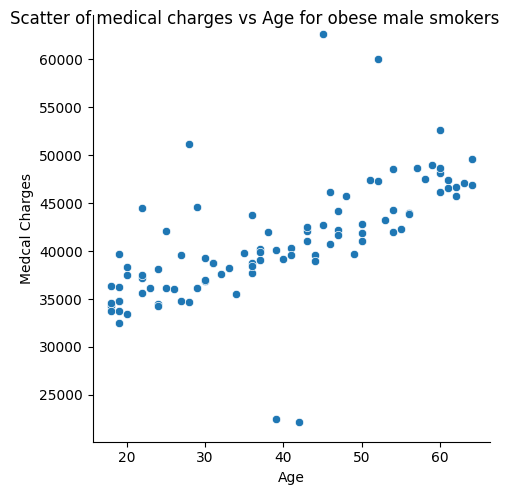

In [6]:
rel_plot = sns.relplot(df_male_obese_smokers, x='age', y='charges', kind='scatter', facet_kws=dict(legend_out=False))
rel_plot.figure.suptitle('Scatter of medical charges vs Age for obese male smokers')
rel_plot.set_axis_labels('Age', 'Medcal Charges')

plt.show()

In [7]:
#since this iterates by integer, values are first increased by *100 to get all integers,
# iterated over then divided by 100 to arrive back at the actual values
age_list = [g/100 for g in range(df_male_obese_smokers['age'].min()*100, df_male_obese_smokers['age'].max()*100)]

#this age list creates a grid of values to later plot the model against to generate
#predicted values for modeling purposes
df_plot1 = pd.DataFrame(columns=['age'])
df_plot1['age'] = age_list

for h in range (2,8):
    xi = df_plot1['age']**h
    xi_name = 'age_degree_'+str(h)
    df_plot1.insert(loc = h-1, column=xi_name, value=xi)

print(df_plot1)

        age  age_degree_2   age_degree_3  age_degree_4  age_degree_5  \
0     18.00      324.0000    5832.000000  1.049760e+05  1.889568e+06   
1     18.01      324.3601    5841.725401  1.052095e+05  1.894823e+06   
2     18.02      324.7204    5851.461608  1.054433e+05  1.900089e+06   
3     18.03      325.0809    5861.208627  1.056776e+05  1.905367e+06   
4     18.04      325.4416    5870.966464  1.059122e+05  1.910657e+06   
...     ...           ...            ...           ...           ...   
4595  63.95     4089.6025  261530.079875  1.672485e+07  1.069554e+09   
4596  63.96     4090.8816  261652.787136  1.673531e+07  1.070391e+09   
4597  63.97     4092.1609  261775.532773  1.674578e+07  1.071228e+09   
4598  63.98     4093.4404  261898.316792  1.675625e+07  1.072065e+09   
4599  63.99     4094.7201  262021.139199  1.676673e+07  1.072903e+09   

      age_degree_6  age_degree_7  
0     3.401222e+07  6.122200e+08  
1     3.412576e+07  6.146049e+08  
2     3.423960e+07  6.169976e+

In [13]:
# backward elimination selection
df_regr = df_male_obese_smokers[['age', 'charges']].copy()
for i in range (2,8):
    xi = df_regr['age']**i
    xi_name = 'age_degree_'+str(i)
    df_regr.insert(loc = i, column=xi_name, value=xi)
print(df_regr)


      age      charges  age_degree_2  age_degree_3  age_degree_4  \
14     27  39611.75770           729         19683        531441   
19     30  36837.46700           900         27000        810000   
29     31  38711.00000           961         29791        923521   
30     22  35585.57600           484         10648        234256   
34     28  51194.55914           784         21952        614656   
...   ...          ...           ...           ...           ...   
1284   61  47403.88000          3721        226981      13845841   
1288   20  38344.56600           400          8000        160000   
1291   19  34828.65400           361          6859        130321   
1300   45  62592.87309          2025         91125       4100625   
1301   62  46718.16325          3844        238328      14776336   

      age_degree_5  age_degree_6   age_degree_7  
14        14348907     387420489    10460353203  
19        24300000     729000000    21870000000  
29        28629151     887503681 

In [14]:
# backward elimination selection
vars = set(df_regr.columns)
vars.remove('charges')
intercept = True
pval_threshold = .05
highest_pval = .1

while(len(vars) > 0 and highest_pval > pval_threshold):
    if intercept == True:
        regr_model = '{} ~ {}'.format('charges', '+'.join(vars))
    else:
        regr_model = '{} ~ {}'.format('charges', '+'.join(vars))
        regr_model = regr_model + '-1'
    print(regr_model)
    testmodel = smf.ols(regr_model, df_regr).fit()
    pval_testmodel = testmodel.pvalues
    highest_pval = max(pval_testmodel)
    # the model is looking to identify the least significant variable and remove it with each iteration until all thats left is statisically significant variables
    # the higher the pvalue the less statistically significant with .001 representing 99.9% statistical significance
    if highest_pval > pval_threshold:
        #determines if the intercept is the least statisically significant value.  If so the intercept value is moved to false and the intercept is removed in the next iteration later)
        if pval_testmodel.idxmax() == "Intercept":
            intercept = False
        else:
            vars.remove(pval_testmodel.idxmax())
print(vars)
if intercept == True:
    regr_model = '{} ~ {}'.format('charges', '+'.join(vars))
else:
    regr_model = '{} ~ {}'.format('charges', '+'.join(vars))
    regr_model = regr_model + '-1'

model = smf.ols(regr_model, df_regr).fit()
print(model.summary())

charges ~ age_degree_7+age_degree_3+age_degree_2+age_degree_6+age_degree_4+age+age_degree_5
charges ~ age_degree_7+age_degree_2+age_degree_6+age_degree_4+age+age_degree_5
charges ~ age_degree_7+age_degree_2+age_degree_6+age_degree_4+age_degree_5
charges ~ age_degree_7+age_degree_2+age_degree_6+age_degree_4+age_degree_5-1
{'age_degree_7', 'age_degree_2', 'age_degree_6', 'age_degree_4', 'age_degree_5'}
                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1465.
Date:                Sun, 30 Nov 2025   Prob (F-statistic):                    7.87e-84
Time:                        12:13:42   Log-Likelihood:                         -924.84
No. Observations:                  94   AIC:                        

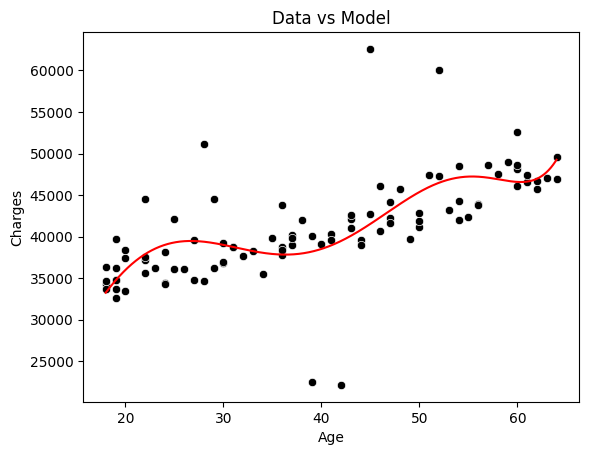

In [17]:
#now we apply the model across the full grid of ages defined earlier as df_plot1 to visualize the model
df_plot1['y_pred'] = model.predict(df_plot1)

fig, ax = plt.subplots()
sns.scatterplot(x = df_regr.age, y = df_regr.charges, color = 'black', ax=ax)
sns.lineplot(x = df_plot1.age, y = df_plot1.y_pred, color = 'red', ax=ax)

plt.title('Data vs Model')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [18]:
# the curved nature of the model output and how it tightly flows with the datapoints indicates likely overfitting and a need for regularization
# regularization is intended to restrain the model output and reduce collinearity
# considering that this model is a multivariate of a single independent variable collinearity is high
# Lasso and Ridge models restrain by manipulating coefficients, Lasso sets some to 0, Ridge keeps them small

x = df_regr.iloc[:,[2,4,5,6,7]]
y = df_regr.iloc[:, 1].values.reshape(-1, 1)

print(x)
print(y)

      age_degree_2  age_degree_4  age_degree_5  age_degree_6   age_degree_7
14             729        531441      14348907     387420489    10460353203
19             900        810000      24300000     729000000    21870000000
29             961        923521      28629151     887503681    27512614111
30             484        234256       5153632     113379904     2494357888
34             784        614656      17210368     481890304    13492928512
...            ...           ...           ...           ...            ...
1284          3721      13845841     844596301   51520374361  3142742836021
1288           400        160000       3200000      64000000     1280000000
1291           361        130321       2476099      47045881      893871739
1300          2025       4100625     184528125    8303765625   373669453125
1301          3844      14776336     916132832   56800235584  3521614606208

[94 rows x 5 columns]
[[39611.7577 ]
 [36837.467  ]
 [38711.     ]
 [35585.576  ]
 [511